In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 76.2 MB/s eta 0:00:00


In [ ]:


import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Install cartopy if you haven't already
!pip install cartopy

# Open the netCDF file using xarray
ds = xr.open_dataset('rain_qdm.nc')

# Print information about the dataset
print(ds.info())

# Print the names of variables
print("\nVariables:")
print(ds.variables)

# Access and print specific data
# Replace with the actual variable name from your dataset
if 'rain' in ds.variables:
    rain_data = ds['rain']
    print("\nRain data:")
    print(rain_data)

# Example of creating a simple plot (replace with your desired visualization)
if 'longitude' in ds.variables and 'latitude' in ds.variables and 'rain' in ds.variables:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Plot rain data
    rain_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)

    plt.title('Rain Data')
    plt.show()
else:
    print("Missing required variables (longitude, latitude, rain) for plotting.")

xarray.Dataset {
dimensions:
	lat = 13 ;
	lon = 12 ;
	time = 31390 ;

variables:
	float64 lat(lat) ;
	float64 lon(lon) ;
	datetime64[ns] time(time) ;
	float64 rainfall(time, lat, lon) ;

// global attributes:
}None

Variables:
Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 13)> Size: 104B
array([21.5 , 21.75, 22.  , 22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75,
       24.  , 24.25, 24.5 ]), 'lon': <xarray.IndexVariable 'lon' (lon: 12)> Size: 96B
array([88.5 , 88.75, 89.  , 89.25, 89.5 , 89.75, 90.  , 90.25, 90.5 , 90.75,
       91.  , 91.25]), 'time': <xarray.IndexVariable 'time' (time: 31390)> Size: 251kB
array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', ..., '2100-12-29T00:00:00.000000000',
       '2100-12-30T00:00:00.000000000', '2100-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]'), 'rainfall': <xarray.Variable (time: 31390, lat: 13, lon: 12)> Size: 39MB
[4896840 values with dtype=float64]})
Missing requir

In [ ]:
# !pip install imageio
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio

# Open the netCDF file using xarray
ds = xr.open_dataset('/content/spi_spatial.nc')

# Create a list to store the frames for the GIF
frames = []

# Loop through the years from 2015 to 2100
for year in range(2015, 2101):
    # Select data for the current year
    year_data = ds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Calculate the total rainfall for the year
    total_rainfall = year_data['spi'].max(dim='time')

    # Create the map projection
    projection = ccrs.PlateCarree()

    # Create a figure and an axes object
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Plot the total rainfall using pcolormesh
    im = ax.pcolormesh(total_rainfall.lon, total_rainfall.lat, total_rainfall,
                       transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and land features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map
    ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Total Rainfall (mm)')

    # Add a title to the plot with the current year
    plt.title(f'Average SPI Map for {year}')

    # Save the current frame to a temporary file
    plt.savefig(f'temp_frame_{year}.png')
    plt.close(fig)  # Close the figure to release resources

    # Read the saved frame and append it to the frames list
    frames.append(imageio.imread(f'temp_frame_{year}.png'))

# Create the animated GIF using imageio
imageio.mimsave('spi_avg_animation.gif', frames, fps=5)  # Adjust fps (frames per second) as needed

# Optionally, remove the temporary frame files
import os
for year in range(2015, 2101):
    os.remove(f'temp_frame_{year}.png')

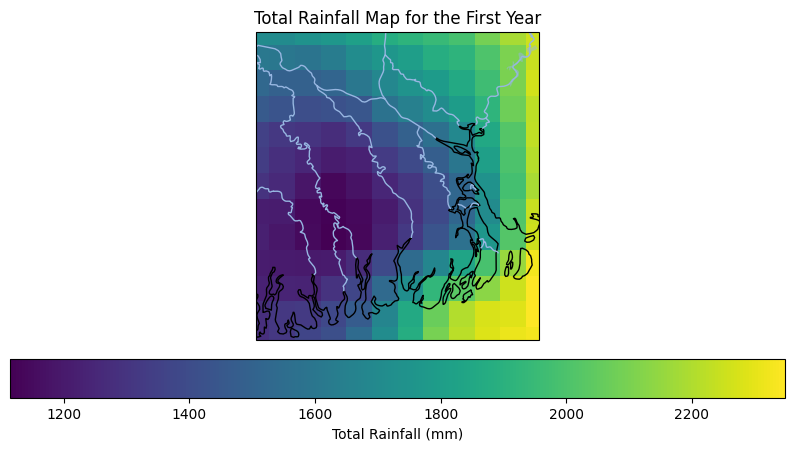

In [ ]:


import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Open the netCDF file using xarray
ds = xr.open_dataset('rain_qdm.nc')

# Select the first year of data
first_year_data = ds.sel(time=slice('2015-01-01', '2015-12-31'))

# Calculate the total rainfall for the first year
total_rainfall = first_year_data['rainfall'].sum(dim='time')

# Create a map projection
projection = ccrs.PlateCarree()

# Create a figure and an axes object
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Plot the total rainfall using pcolormesh
im = ax.pcolormesh(total_rainfall.lon, total_rainfall.lat, total_rainfall, transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines and land features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Set the extent of the map
ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())
# Add a colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Total Rainfall (mm)')

# Add a title to the plot
plt.title('Total Rainfall Map for the First Year')

# Display the plot
plt.show()

In [ ]:
!pip install imageio
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio

# Open the netCDF file using xarray
ds = xr.open_dataset('rain_qdm.nc')

# Create a list to store the frames for the GIF
frames = []

# Loop through the years from 2015 to 2100
for year in range(2015, 2101):
    # Select data for the current year
    year_data = ds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Calculate the total rainfall for the year
    total_rainfall = year_data['rainfall'].sum(dim='time')

    # Create the map projection
    projection = ccrs.PlateCarree()

    # Create a figure and an axes object
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Plot the total rainfall using pcolormesh
    im = ax.pcolormesh(total_rainfall.lon, total_rainfall.lat, total_rainfall,
                       transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and land features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map
    ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Total Rainfall (mm)')

    # Add a title to the plot with the current year
    plt.title(f'Total Rainfall Map for {year}')

    # Save the current frame to a temporary file
    plt.savefig(f'temp_frame_{year}.png')
    plt.close(fig)  # Close the figure to release resources

    # Read the saved frame and append it to the frames list
    frames.append(imageio.imread(f'temp_frame_{year}.png'))

# Create the animated GIF using imageio
imageio.mimsave('total_rainfall_animation.gif', frames, fps=5)  # Adjust fps (frames per second) as needed

# Optionally, remove the temporary frame files
import os
for year in range(2015, 2101):
    os.remove(f'temp_frame_{year}.png')

<ipython-input-47-e0a6a85c52cd>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-47-e0a6a85c52cd>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-47-e0a6a85c52cd>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imrea

In [ ]:
# !pip install imageio
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio

# Open the netCDF file using xarray
ds = xr.open_dataset('/content/spi_spatial.nc')

# Create a list to store the frames for the GIF
frames = []

# Loop through the years from 2015 to 2100
for year in range(2015, 2101):
    # Select data for the current year
    year_data = ds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Calculate the total rainfall for the year
    total_rainfall = year_data['spi'].max(dim='time')

    # Create the map projection
    projection = ccrs.PlateCarree()

    # Create a figure and an axes object
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Plot the total rainfall using pcolormesh
    im = ax.pcolormesh(total_rainfall.lon, total_rainfall.lat, total_rainfall,
                       transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and land features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map
    ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Total Rainfall (mm)')

    # Add a title to the plot with the current year
    plt.title(f'Average SPI Map for {year}')

    # Save the current frame to a temporary file
    plt.savefig(f'temp_frame_{year}.png')
    plt.close(fig)  # Close the figure to release resources

    # Read the saved frame and append it to the frames list
    frames.append(imageio.imread(f'temp_frame_{year}.png'))

# Create the animated GIF using imageio
imageio.mimsave('spi_avg_animation.gif', frames, fps=5)  # Adjust fps (frames per second) as needed

# Optionally, remove the temporary frame files
import os
for year in range(2015, 2101):
    os.remove(f'temp_frame_{year}.png')

<ipython-input-51-7bf188bceed0>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-51-7bf188bceed0>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-51-7bf188bceed0>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imrea

In [ ]:
# !pip install imageio
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio

# Open the netCDF file using xarray
ds = xr.open_dataset('/content/spi_spatial.nc')

# Create a list to store the frames for the GIF
frames = []

# Loop through the years from 2015 to 2100
for year in range(2015, 2101):
    # Select data for the current year
    year_data = ds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Calculate the total rainfall for the year
    total_rainfall = year_data['spi'].min(dim='time')

    # Create the map projection
    projection = ccrs.PlateCarree()

    # Create a figure and an axes object
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Plot the total rainfall using pcolormesh
    im = ax.pcolormesh(total_rainfall.lon, total_rainfall.lat, total_rainfall,
                       transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and land features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map
    ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Total Rainfall (mm)')

    # Add a title to the plot with the current year
    plt.title(f'Average SPI Map for {year}')

    # Save the current frame to a temporary file
    plt.savefig(f'temp_frame_{year}.png')
    plt.close(fig)  # Close the figure to release resources

    # Read the saved frame and append it to the frames list
    frames.append(imageio.imread(f'temp_frame_{year}.png'))

# Create the animated GIF using imageio
imageio.mimsave('spi_avg_animation.gif', frames, fps=5)  # Adjust fps (frames per second) as needed

# Optionally, remove the temporary frame files
import os
for year in range(2015, 2101):
    os.remove(f'temp_frame_{year}.png')

<ipython-input-52-a56cd7e02351>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-52-a56cd7e02351>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-52-a56cd7e02351>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imrea

In [ ]:
import xarray as xr
import numpy as np
import scipy.stats as stats

# Load your daily rainfall data from the NetCDF file
dataset = xr.open_dataset("/content/rain_qdm.nc")  # Replace with the actual file path

# Assuming that the variable name for rainfall in your NetCDF file is 'rainfall'
# If it's different, adjust the variable name accordingly
rainfall_data = dataset['rainfall'].values  # Extract the rainfall data

# You can choose the time period for SPI calculation (e.g., 30-day window)
window_size = 30

# Step 1: Calculate the moving sum for the chosen time window (e.g., 30-day SPI)
rainfall_sum = np.array([np.sum(rainfall_data[i:i+window_size]) for i in range(len(rainfall_data) - window_size + 1)])

# Step 2: Remove zero or negative rainfall sums before fitting the distribution
rainfall_sum_nonzero = rainfall_sum[rainfall_sum > 0]

# Step 3: Calculate the long-term mean and standard deviation of the summed rainfall
mean_precip = np.mean(rainfall_sum_nonzero)
std_precip = np.std(rainfall_sum_nonzero)

# Step 4: Calculate the SPI as the standardized value (z-score)
spi = (rainfall_sum_nonzero - mean_precip) / std_precip

# Step 5: (Optional) Fit a probability distribution to the data (Gamma or Pearson Type III)
# Fit a Gamma distribution (with positive rainfall data only)
shape, loc, scale = stats.gamma.fit(rainfall_sum_nonzero, floc=0)  # Fit a Gamma distribution

# Step 6: Calculate the SPI based on the fitted Gamma distribution (using the percentiles)
spi_gamma = stats.gamma.cdf(rainfall_sum_nonzero, shape, loc, scale)  # Convert to cumulative probability

# Output SPI values
print(f"Calculated SPI values: {spi[:1000]}")  # Show first 10 SPI values


Calculated SPI values: [-0.71158052 -0.71158023 -0.71186303 -0.71257501 -0.71295954 -0.71971413
 -0.91531968 -0.91667559 -0.91656283 -0.91653902 -0.91363484 -0.90963783
 -0.86315042 -0.86302872 -0.86302971 -0.86302972 -0.86302956 -0.86299098
 -0.86289648 -0.86283722 -0.86283697 -0.86283701 -0.86284402 -0.86284402
 -0.8628437  -0.8628437  -0.86278485 -0.86006505 -0.85981486 -0.8598149
 -0.8598149  -0.85981519 -0.85981608 -0.85981609 -0.8598161  -0.85983045
 -0.8646688  -0.86562483 -0.86556576 -0.86558828 -0.86849247 -0.87248251
 -0.91890679 -0.91707404 -0.91389393 -0.87951403 -0.86738264 -0.86077713
 -0.860622   -0.86061453 -0.86052831 -0.86047303 -0.8604612  -0.86044278
 -0.86041931 -0.86037539 -0.85925014 -0.86196225 -0.8565784  -0.85655891
 -0.85654777 -0.85654725 -0.85654724 -0.85654713 -0.85653872 -0.8564842
 -0.85648153 -0.85649956 -0.85667507 -0.85667654 -0.85667654 -0.85669879
 -0.85676609 -0.85872598 -0.8619061  -0.89628569 -0.90841511 -0.91505907
 -0.91530136 -0.91534727 -0.91

In [ ]:


import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio
import os

# Install cartopy if you haven't already
!pip install cartopy imageio

# Open the netCDF file using xarray
ds = xr.open_dataset('spi_spatial.nc')

# Print information about the dataset
print(ds.info())

# Print the names of variables
print("\nVariables:")
print(ds.variables)

# Access and print specific data (example: 'spi')
if 'spi' in ds.variables:
    spi_data = ds['spi']
    print("\nSPI data:")
    print(spi_data)
else:
    print("Variable 'spi' not found in the dataset.")

xarray.Dataset {
dimensions:
	time = 31390 ;
	lat = 13 ;
	lon = 12 ;

variables:
	float64 spi(time, lat, lon) ;
	datetime64[ns] time(time) ;
	float64 lat(lat) ;
	float64 lon(lon) ;

// global attributes:
}None

Variables:
Frozen({'spi': <xarray.Variable (time: 31390, lat: 13, lon: 12)> Size: 39MB
[4896840 values with dtype=float64], 'time': <xarray.IndexVariable 'time' (time: 31390)> Size: 251kB
array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', ..., '2100-12-29T00:00:00.000000000',
       '2100-12-30T00:00:00.000000000', '2100-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]'), 'lat': <xarray.IndexVariable 'lat' (lat: 13)> Size: 104B
array([21.5 , 21.75, 22.  , 22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75,
       24.  , 24.25, 24.5 ]), 'lon': <xarray.IndexVariable 'lon' (lon: 12)> Size: 96B
array([88.5 , 88.75, 89.  , 89.25, 89.5 , 89.75, 90.  , 90.25, 90.5 , 90.75,
       91.  , 91.25])})

SPI data:
<xarray.DataA

In [ ]:
# prompt: Download the average rainfall from rain_qdm.nc in excel file for all the years in excel


!pip install xlsxwriter  # Install the xlsxwriter module

import xarray as xr
import pandas as pd

# Load the NetCDF file
dataset = xr.open_dataset("/content/rain_qdm.nc")

# Assuming 'rainfall' is the variable name and 'time' is the time dimension
rainfall_data = dataset['rainfall']

# Group data by year
yearly_rainfall = rainfall_data.groupby('time.year').mean()

# Convert to pandas DataFrame for easier export to Excel
yearly_rainfall_df = yearly_rainfall.to_dataframe()

# Create an Excel writer object
writer = pd.ExcelWriter('average_rainfall_by_year.xlsx', engine='xlsxwriter')

# Write the DataFrame to an Excel sheet
yearly_rainfall_df.to_excel(writer, sheet_name='Average Rainfall')

# Save the Excel file
writer.close()

# Optionally, display the DataFrame in the notebook (optional)
yearly_rainfall_df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.8 MB/s eta 0:00:00


rainfall
year lat  lon            
2015 21.5 88.50  3.504392
          88.75  3.597760
          89.00  3.751987
          89.25  3.869134
          89.50  4.227220
...                   ...
2100 24.5 90.25  4.797562
          90.50  4.824714
          90.75  4.909111
          91.00  5.064488
          91.25  5.239952

[13416 rows x 1 columns]

# Initiation

In [ ]:
!pip install zarr
!pip install fsspec
!pip install cartopy
!pip install cftime
!pip install os
!pip install --upgrade git+https://github.com/pangeo-data/xESMF.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 74.2 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=14c15cf915a7903f80c20c64418f925d595399fa112132ffe99f779c6eb038d2
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  Cloning https://github.com/pangeo-data/xESMF.git to /tmp/pip-req-build-hz7i9f5p
  Running command git clone --filter=blob:none --quiet https://github.com/pangeo-data/xESMF.git /tmp/pip-req-build-hz7i9f5p
  Resolved https://github.com/pangeo-data/xESMF.git to commit feebcfc11147eb00e3256924f0fded148

In [ ]:
!pip install python-cmethods
!pip install zarr
!pip install fsspec
!pip install cartopy
!pip install cftime
!pip install os
!pip install xarray
!pip install zarr
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 65.6 MB/s eta 0:00:00


In [ ]:
# pip install climate_indices

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.0 requires scipy>=1.11.2, but you have scipy 1.10.1 which is incompatible.


In [ ]:


import xarray as xr
import os

# Replace 'hum_qdm.nc' with the actual path to your file if it's not in the current directory
file_path = '/content/rain_qdm.nc'

if os.path.exists(file_path):
    try:
        ds = xr.open_dataset(file_path)
        print(ds)
        print("\nDataset Dimensions:")
        print(ds.dims)
        print("\nDataset Coordinates:")
        print(ds.coords)
        print("\nDataset Variables:")
        print(ds.variables)
        print("\nDataset Attributes:")
        print(ds.attrs)
        ds.close()  # Close the dataset to free up resources
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: File '{file_path}' not found.")

<xarray.Dataset> Size: 39MB
Dimensions:   (lat: 13, lon: 12, time: 31390)
Coordinates:
  * lat       (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon       (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
  * time      (time) datetime64[ns] 251kB 2015-01-01 2015-01-02 ... 2100-12-31
Data variables:
    rainfall  (time, lat, lon) float64 39MB ...

Dataset Dimensions:
FrozenMappingWarningOnValuesAccess({'lat': 13, 'lon': 12, 'time': 31390})

Dataset Coordinates:
Coordinates:
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
  * time     (time) datetime64[ns] 251kB 2015-01-01 2015-01-02 ... 2100-12-31

Dataset Variables:
Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 13)> Size: 104B
array([21.5 , 21.75, 22.  , 22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75,
       24.  , 24.25, 24.5 ]), 'lon': <xarray.IndexVariable 'lon' (lon: 12)> Size

In [ ]:
!pip install xclim

In [ ]:
!pip install pySPI

In [ ]:
!pip install --upgrade scipy
!pip uninstall scipy climate_indices
!pip install scipy climate_indices

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
climate-indices 2.0.1 requires scipy==1.10.1, but you have scipy 1.15.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
Found existing installation: scipy 1.15.1
Uninstalling scipy-1.15.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.15.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.

In [ ]:
!pip show scipy
!pip install scipy==1.10.1
import xarray as xr
from climate_indices import indices

# Confirm libraries are imported without error
print("Libraries imported successfully!")

Name: scipy
Version: 1.10.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2022, SciPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions
        are met:
        
        1. Redistributions of source code must retain the above copyright
           notice, this list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above
           copyright notice, this list of conditions and the following
           disclaimer in the documentation and/or other materials provided
           with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived

ImportError: cannot import name 'prod' from 'scipy._lib._util' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/_util.py)

# Drought projections

In [ ]:
# Open the dataset
ds = xr.open_dataset('/content/temp_qdm.nc')

# Sort the dataset by time
ds = ds.sortby('time')

# Calculate monthly averages
monthly_averages = ds['tas'].resample(time='M').mean()

# Save to a new NetCDF file
monthly_averages.to_netcdf('temp_qdm_monthly.nc')

/usr/local/lib/python3.10/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [ ]:


import xarray as xr
import os

# Replace 'hum_qdm.nc' with the actual path to your file if it's not in the current directory
file_path = '/content/temp_qdm_monthly_clipped.nc'

if os.path.exists(file_path):
    try:
        ds = xr.open_dataset(file_path)
        print(ds)
        print("\nDataset Dimensions:")
        print(ds.dims)
        print("\nDataset Coordinates:")
        print(ds.coords)
        print("\nDataset Variables:")
        print(ds.variables)
        print("\nDataset Attributes:")
        print(ds.attrs)
        ds.close()  # Close the dataset to free up resources
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: File '{file_path}' not found.")

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 1032, lat: 13, lon: 12)
Coordinates:
  * time     (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
    height   float64 8B ...
Data variables:
    tas      (time, lat, lon) float64 1MB ...

Dataset Dimensions:
FrozenMappingWarningOnValuesAccess({'time': 1032, 'lat': 13, 'lon': 12})

Dataset Coordinates:
Coordinates:
  * time     (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
    height   float64 8B ...

Dataset Variables:
Frozen({'tas': <xarray.Variable (time: 1032, lat: 13, lon: 12)> Size: 1MB
[160992 values with dtype=float64], 'time': <xarray.IndexVariable 'time' (time: 1032)> Size: 8kB
array(['

In [ ]:

import pandas as pd
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset('/content/temp_qdm_monthly1.nc')

# Assuming 'tas' is the variable you want to export
data_variable = 'tas'

if data_variable in ds.variables:
    # Convert the xarray DataArray to a pandas DataFrame
    df = ds[data_variable].to_dataframe()

    # Reset the index to make 'time' a regular column
    df = df.reset_index()

    # Save the DataFrame to an Excel file
    df.to_excel('temp_qdm_monthly1.xlsx', index=False)
    print("Data successfully saved to temp_qdm_monthly1.xlsx")

else:
    print(f"Error: Variable '{data_variable}' not found in the NetCDF file.")

Data successfully saved to temp_qdm_monthly1.xlsx


In [ ]:
import xarray as xr

# Open the dataset
ds = xr.open_dataset('/content/temp_qdm.nc')

# Sort the dataset by time
ds = ds.sortby('time')

# Remove duplicate time values
_, index = np.unique(ds['time'], return_index=True)
ds = ds.isel(time=index)

# Calculate monthly averages
monthly_averages = ds['tas'].resample(time='M').mean()

# Save to a new NetCDF file
monthly_averages.to_netcdf('temp_qdm_monthly1.nc')

/usr/local/lib/python3.10/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [ ]:


import xarray as xr

# Open the dataset
ds = xr.open_dataset('/content/temp_qdm_monthly.nc')

# Select data from 2015 to 2100
clipped_data = ds.sel(time=slice('2015', '2100'))

# Save the clipped data to a new NetCDF file
clipped_data.to_netcdf('temp_qdm_monthly_clipped.nc')

In [ ]:


import xarray as xr
import numpy as np
from scipy import stats

# Load the rainfall data
ds = xr.open_dataset('/content/rain_qdm_monthly.nc')
rainfall = ds['rainfall']

# Replace negative and zero values with 0.0001
rainfall = rainfall.where(rainfall > 0, 0.0001)

# Calculate SPI
def calculate_spi(data, scale):
    rolled = data.rolling(time=scale).sum()

    def fit_gamma_and_calculate_spi(values):
        # Handle missing values and zero sums
        values = values[~np.isnan(values)]
        if len(values) == 0 or values.sum() == 0:
            return np.nan

        shape, loc, scale = stats.gamma.fit(values, floc=0)
        prob = stats.gamma.cdf(values[-1], shape, loc=loc, scale=scale)
        return stats.norm.ppf(prob)

    return xr.apply_ufunc(
        fit_gamma_and_calculate_spi,
        rolled,
        input_core_dims=[['time']],
        vectorize=True
    )

# Calculate 3-month SPI
spi_3month = calculate_spi(rainfall, scale=3)

# Add SPI to the dataset
ds['spi_3month'] = spi_3month

# Save the updated dataset
ds.to_netcdf('rain_qdm_monthly_with_spi.nc')

In [ ]:


import xarray as xr
import os

# Replace 'hum_qdm.nc' with the actual path to your file if it's not in the current directory
file_path = '/content/rain_qdm_monthly_with_spi.nc'

if os.path.exists(file_path):
    try:
        ds = xr.open_dataset(file_path)
        print(ds)
        print("\nDataset Dimensions:")
        print(ds.dims)
        print("\nDataset Coordinates:")
        print(ds.coords)
        print("\nDataset Variables:")
        print(ds.variables)
        print("\nDataset Attributes:")
        print(ds.attrs)
        ds.close()  # Close the dataset to free up resources
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: File '{file_path}' not found.")

<xarray.Dataset> Size: 1MB
Dimensions:     (time: 1032, lat: 13, lon: 12)
Coordinates:
  * time        (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat         (lat) float64 104B 21.5 21.75 22.0 22.25 ... 24.0 24.25 24.5
  * lon         (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.75 91.0 91.25
Data variables:
    rainfall    (time, lat, lon) float64 1MB ...
    spi_3month  (lat, lon) float64 1kB ...

Dataset Dimensions:
FrozenMappingWarningOnValuesAccess({'time': 1032, 'lat': 13, 'lon': 12})

Dataset Coordinates:
Coordinates:
  * time     (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25

Dataset Variables:
Frozen({'rainfall': <xarray.Variable (time: 1032, lat: 13, lon: 12)> Size: 1MB
[160992 values with dtype=float64], 'time': <xarray.IndexVariable 'time' (time: 1032)> Size: 8kB
array(['2015

In [ ]:


import pandas as pd
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset('/content/rain_qdm_monthly_with_spi.nc')

# Assuming 'spi_3month' is the variable you want to export
data_variable = 'spi_3month'

if data_variable in ds.variables:
    # Convert the xarray DataArray to a pandas DataFrame
    df = ds[data_variable].to_dataframe()

    # Reset the index to make 'time' a regular column
    df = df.reset_index()

    # Save the DataFrame to an Excel file
    df.to_excel('rain_qdm_monthly_with_spi.xlsx', index=False)
    print("Data successfully saved to rain_qdm_monthly_with_spi.xlsx")

else:
    print(f"Error: Variable '{data_variable}' not found in the NetCDF file.")

Data successfully saved to rain_qdm_monthly_with_spi.xlsx


In [ ]:
!pip install imageio
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio

# Open the netCDF file using xarray
ds = xr.open_dataset('/content/rain_qdm_monthly_with_spi.nc')

# Create a list to store the frames for the GIF
frames = []

# Loop through the years from 2015 to 2100
for year in range(2015, 2101):
    # Select data for the current year
    year_data = ds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    # Calculate the total rainfall for the year
    total_rainfall = year_data['rainfall'].mean(dim='time')

    # Create the map projection
    projection = ccrs.PlateCarree()

    # Create a figure and an axes object
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Plot the total rainfall using pcolormesh
    im = ax.pcolormesh(total_rainfall.lon, total_rainfall.lat, total_rainfall,
                       transform=ccrs.PlateCarree(), cmap='viridis')

    # Add coastlines and land features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map
    ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Total Rainfall (mm)')

    # Add a title to the plot with the current year
    plt.title(f'Total Rainfall Map for {year}')

    # Save the current frame to a temporary file
    plt.savefig(f'temp_frame_{year}.png')
    plt.close(fig)  # Close the figure to release resources

    # Read the saved frame and append it to the frames list
    frames.append(imageio.imread(f'temp_frame_{year}.png'))

# Create the animated GIF using imageio
imageio.mimsave('total_rainfall_animation.gif', frames, fps=5)  # Adjust fps (frames per second) as needed

# Optionally, remove the temporary frame files
import os
for year in range(2015, 2101):
    os.remove(f'temp_frame_{year}.png')

<ipython-input-83-5ee7287ff605>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-83-5ee7287ff605>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{year}.png'))
<ipython-input-83-5ee7287ff605>:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imrea

In [ ]:
import xarray as xr
import numpy as np
from scipy.stats import gamma, norm

# Replace the file path with your NetCDF file path
input_nc_file = "/content/rain_qdm_monthly.nc"
output_nc_file = "out_spi3.nc"

# Step 1: Load the rainfall data
ds = xr.open_dataset(input_nc_file)
rainfall_var = 'rainfall'  # Change this to match your rainfall variable name
rainfall_data = ds[rainfall_var]

# Step 2: Replace negative or zero values with 0.0001
rainfall_data = rainfall_data.where(rainfall_data > 0, 0.0001)

# Step 3: Define SPI calculation function
def calculate_spi(data, scale=1):
    """
    Calculate SPI for a 1D array of precipitation data.
    :param data: 1D array of precipitation values
    :param scale: Scale for SPI calculation (e.g., 1 for 1-month SPI)
    :return: 1D array of SPI values
    """
    spi = np.full_like(data, np.nan, dtype=np.float64)
    for i in range(len(data) - scale + 1):
        window = data[i:i + scale]
        if np.any(np.isnan(window)) or np.all(window == 0):
            continue
        shape, loc, scale_param = gamma.fit(window, floc=0)
        cdf = gamma.cdf(window[-1], shape, loc=loc, scale=scale_param)
        spi[i + scale - 1] = norm.ppf(cdf)
    return spi

# Step 4: Calculate SPI
time = ds['time'].values
spi_values = np.full_like(rainfall_data.values, np.nan)  # Initialize with NaN

# Loop over spatial dimensions
for i in range(rainfall_data.shape[1]):
    series = rainfall_data[:, i].values  # Extract the time series
    if np.all(np.isnan(series)):
        continue  # Skip if all values are NaN
    spi_values[:, i] = calculate_spi(series, scale=1)

# Step 5: Save the SPI data to a new NetCDF file
spi_data = xr.DataArray(
    data=spi_values,
    dims=rainfall_data.dims,
    coords=rainfall_data.coords,
    name="SPI",
    attrs={
        "long_name": "Standardized Precipitation Index",
        "scale": 3,
        "units": "unitless",
    },
)

spi_dataset = xr.Dataset({"SPI": spi_data})
spi_dataset.to_netcdf(output_nc_file)

print(f"SPI data saved to {output_nc_file}")


SPI data saved to out_spi3.nc


In [ ]:


import xarray as xr
import pandas as pd

# Open the NetCDF file
ds = xr.open_dataset('output_spi.nc')

# Assuming 'SPI' is the variable you want to export
data_variable = 'SPI'

if data_variable in ds.variables:
    # Convert the xarray DataArray to a pandas DataFrame
    df = ds[data_variable].to_dataframe()

    # Reset the index to make 'time' a regular column
    df = df.reset_index()

    # Save the DataFrame to an Excel file
    df.to_excel('output_spi.xlsx', index=False)
    print("Data successfully saved to output_spi.xlsx")

else:
    print(f"Error: Variable '{data_variable}' not found in the NetCDF file.")

Data successfully saved to output_spi.xlsx


In [ ]:


import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import imageio
import os

# Open the NetCDF file
ds = xr.open_dataset('output_spi.nc')

# Create a list to store the frames for the GIF
frames = []

# Define the time period for the animation (2015-2040)
start_year = 2015
end_year = 2040

# Loop through the months
for month in range(1, 13):
    # Select data for the current month across all years
    monthly_data = ds['SPI'].sel(time=slice(f'{start_year}-{month:02d}', f'{end_year}-{month:02d}'))

    # Calculate the average SPI for the month across the specified years
    average_spi = monthly_data.mean(dim='time')

    # Create the map projection
    projection = ccrs.PlateCarree()

    # Create a figure and an axes object
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Plot the average SPI using pcolormesh
    im = ax.pcolormesh(average_spi.lon, average_spi.lat, average_spi,
                       transform=ccrs.PlateCarree(), cmap='RdBu')

    # Add coastlines and land features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map
    ax.set_extent([88.5, 91.25, 21.5, 24.5], crs=ccrs.PlateCarree())

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='Average SPI')

    # Add a title to the plot with the current month
    plt.title(f'Average SPI for {month}')

    # Save the current frame to a temporary file
    plt.savefig(f'temp_frame_{month}.png')
    plt.close(fig)

    # Read the saved frame and append it to the frames list
    frames.append(imageio.imread(f'temp_frame_{month}.png'))


# Create the animated GIF using imageio
imageio.mimsave('average_spi_animation.gif', frames, fps=1)

# Optionally, remove the temporary frame files
for month in range(1, 13):
    os.remove(f'temp_frame_{month}.png')

<ipython-input-96-c18e1883aacb>:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{month}.png'))
<ipython-input-96-c18e1883aacb>:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'temp_frame_{month}.png'))
<ipython-input-96-c18e1883aacb>:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imr

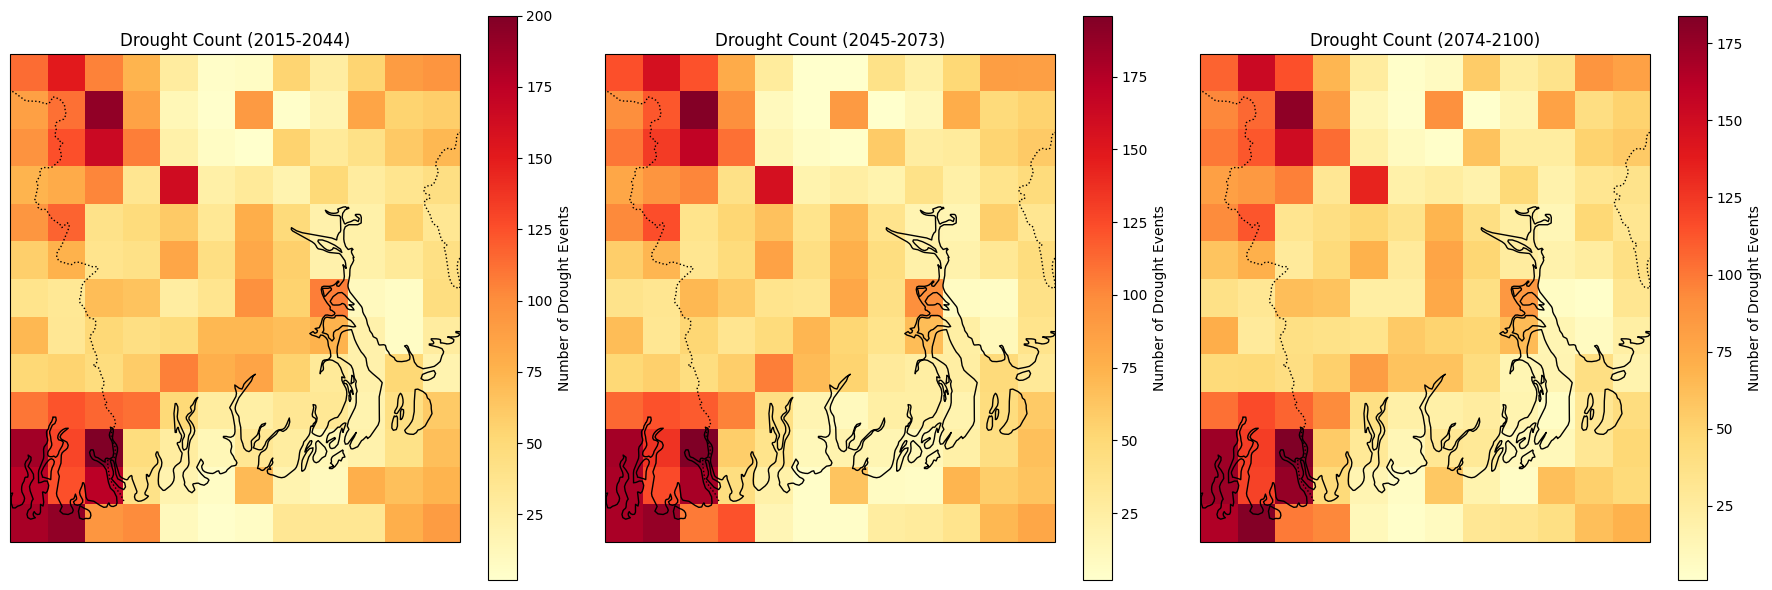

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load SPI data
spi_file = "/content/out_spi3.nc"  # Replace with your NetCDF file
ds = xr.open_dataset(spi_file)
spi = ds['SPI']  # Adjust variable name if needed

# Define time periods
time_periods = {
    "2015-2044": ("2015-01-01", "2044-12-31"),
    "2045-2073": ("2045-01-01", "2073-12-31"),
    "2074-2100": ("2074-01-01", "2100-12-31")
}

# Define the drought threshold
drought_threshold = -1.0  # Moderate drought threshold (SPI < -1)

# Plot drought counts for each time period
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": ccrs.PlateCarree()})

for i, (period, (start, end)) in enumerate(time_periods.items()):
    # Subset SPI data for the time period
    spi_period = spi.sel(time=slice(start, end))

    # Count the number of drought events at each grid point
    drought_count = (spi_period < drought_threshold).sum(dim="time")

    # Plot the map
    ax = axes[i]
    drought_count.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap="YlOrRd", cbar_kwargs={"label": "Number of Drought Events"}
    )
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(f"Drought Count ({period})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


<xarray.DataArray 'SPI' (time: 1032, lat: 13, lon: 12)> Size: 1MB
[160992 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
Attributes:
    long_name:  Standardized Precipitation Index
    scale:      3
    units:      unitless


<ipython-input-17-0ea91e3ce7fe>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar


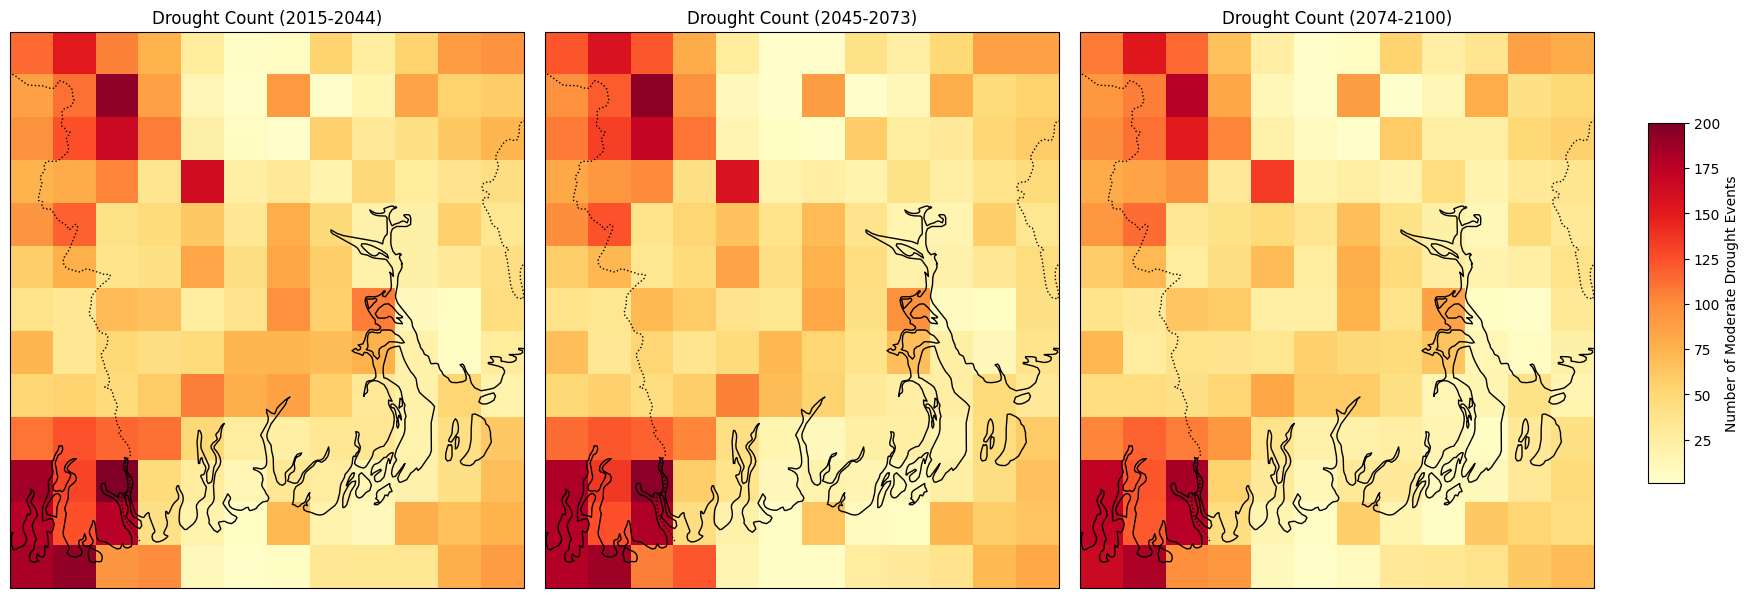

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load SPI data
spi_file = "/content/out_spi3.nc"  # Replace with your NetCDF file
ds = xr.open_dataset(spi_file)
spi = ds['SPI']  # Adjust variable name if needed

# Check dataset details
print(spi)

# Define time periods
time_periods = {
    "2015-2044": ("2015-01-01", "2044-12-31"),
    "2045-2073": ("2045-01-01", "2073-12-31"),
    "2074-2100": ("2074-01-01", "2100-12-31")
}

# Define the drought threshold
drought_threshold = -1.0  # Moderate drought threshold (SPI < -1)

# Plot drought counts for each time period
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position for shared colorbar

# Initialize variable for storing min and max drought counts
global_min, global_max = None, None

# Calculate global min and max for colorbar normalization
for period, (start, end) in time_periods.items():
    spi_period = spi.sel(time=slice(start, end))
    drought_count = (spi_period < drought_threshold).sum(dim="time")
    drought_min, drought_max = drought_count.min().values, drought_count.max().values
    if global_min is None or drought_min < global_min:
        global_min = drought_min
    if global_max is None or drought_max > global_max:
        global_max = drought_max

# Define normalization for shared colorbar
norm = plt.Normalize(global_min, global_max)

# Plot each period
for i, (period, (start, end)) in enumerate(time_periods.items()):
    spi_period = spi.sel(time=slice(start, end))
    drought_count = (spi_period < drought_threshold).sum(dim="time")

    ax = axes[i]
    drought_map = drought_count.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap="YlOrRd", add_colorbar=False, norm=norm
    )
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(f"Drought Count ({period})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Add shared colorbar
cbar = fig.colorbar(drought_map, cax=cbar_ax, orientation="vertical")
cbar.set_label("Number of Moderate Drought Events")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.show()


<xarray.DataArray 'SPI' (time: 1032, lat: 13, lon: 12)> Size: 1MB
[160992 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
Attributes:
    long_name:  Standardized Precipitation Index
    scale:      3
    units:      unitless


<ipython-input-18-bdcc835f26ac>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar


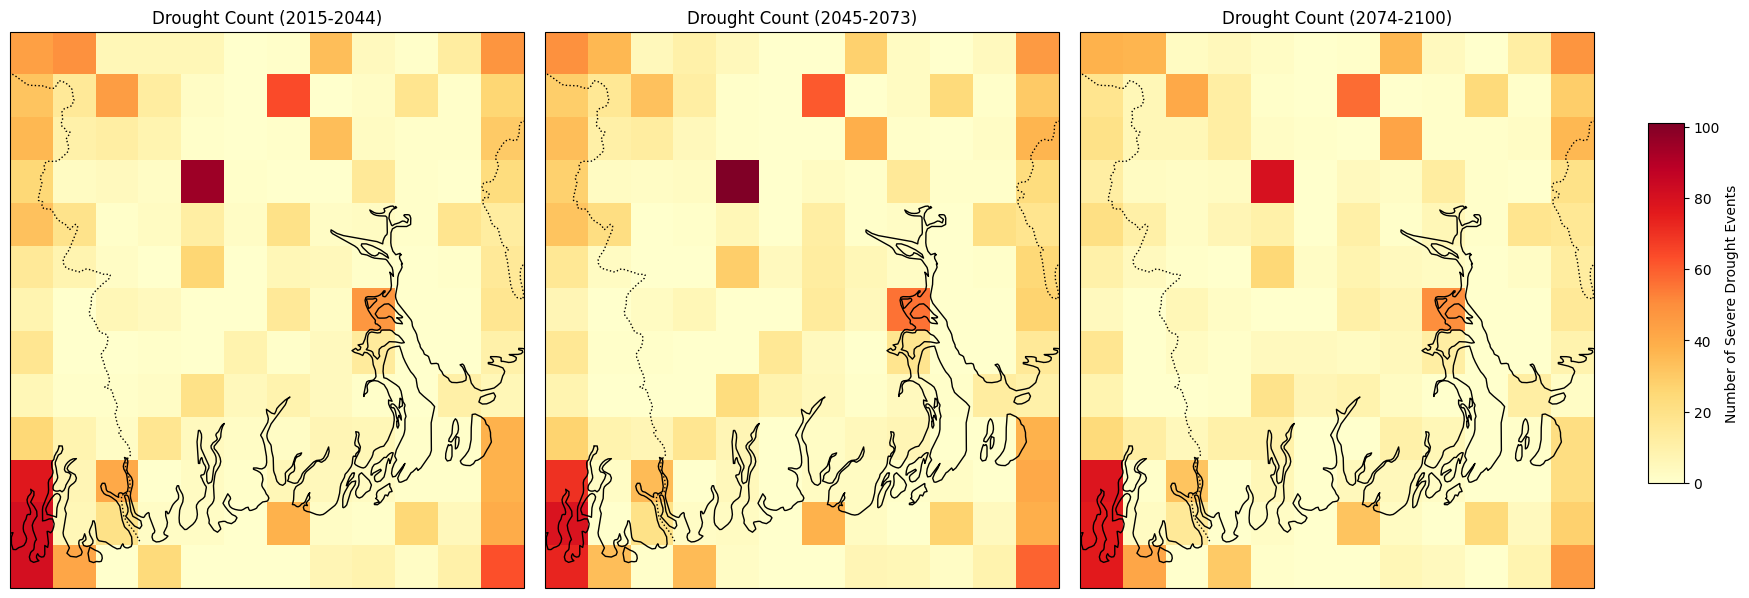

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load SPI data
spi_file = "/content/out_spi3.nc"  # Replace with your NetCDF file
ds = xr.open_dataset(spi_file)
spi = ds['SPI']  # Adjust variable name if needed

# Check dataset details
print(spi)

# Define time periods
time_periods = {
    "2015-2044": ("2015-01-01", "2044-12-31"),
    "2045-2073": ("2045-01-01", "2073-12-31"),
    "2074-2100": ("2074-01-01", "2100-12-31")
}

# Define the drought threshold
drought_threshold = -1.49  # Moderate drought threshold (SPI < -1)

# Plot drought counts for each time period
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position for shared colorbar

# Initialize variable for storing min and max drought counts
global_min, global_max = None, None

# Calculate global min and max for colorbar normalization
for period, (start, end) in time_periods.items():
    spi_period = spi.sel(time=slice(start, end))
    drought_count = (spi_period < drought_threshold).sum(dim="time")
    drought_min, drought_max = drought_count.min().values, drought_count.max().values
    if global_min is None or drought_min < global_min:
        global_min = drought_min
    if global_max is None or drought_max > global_max:
        global_max = drought_max

# Define normalization for shared colorbar
norm = plt.Normalize(global_min, global_max)

# Plot each period
for i, (period, (start, end)) in enumerate(time_periods.items()):
    spi_period = spi.sel(time=slice(start, end))
    drought_count = (spi_period < drought_threshold).sum(dim="time")

    ax = axes[i]
    drought_map = drought_count.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap="YlOrRd", add_colorbar=False, norm=norm
    )
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(f"Drought Count ({period})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Add shared colorbar
cbar = fig.colorbar(drought_map, cax=cbar_ax, orientation="vertical")
cbar.set_label("Number of Severe Drought Events")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.show()


<xarray.DataArray 'SPI' (time: 1032, lat: 13, lon: 12)> Size: 1MB
[160992 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8kB 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 104B 21.5 21.75 22.0 22.25 ... 23.75 24.0 24.25 24.5
  * lon      (lon) float64 96B 88.5 88.75 89.0 89.25 ... 90.5 90.75 91.0 91.25
Attributes:
    long_name:  Standardized Precipitation Index
    scale:      3
    units:      unitless


<ipython-input-19-305fe6037996>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar


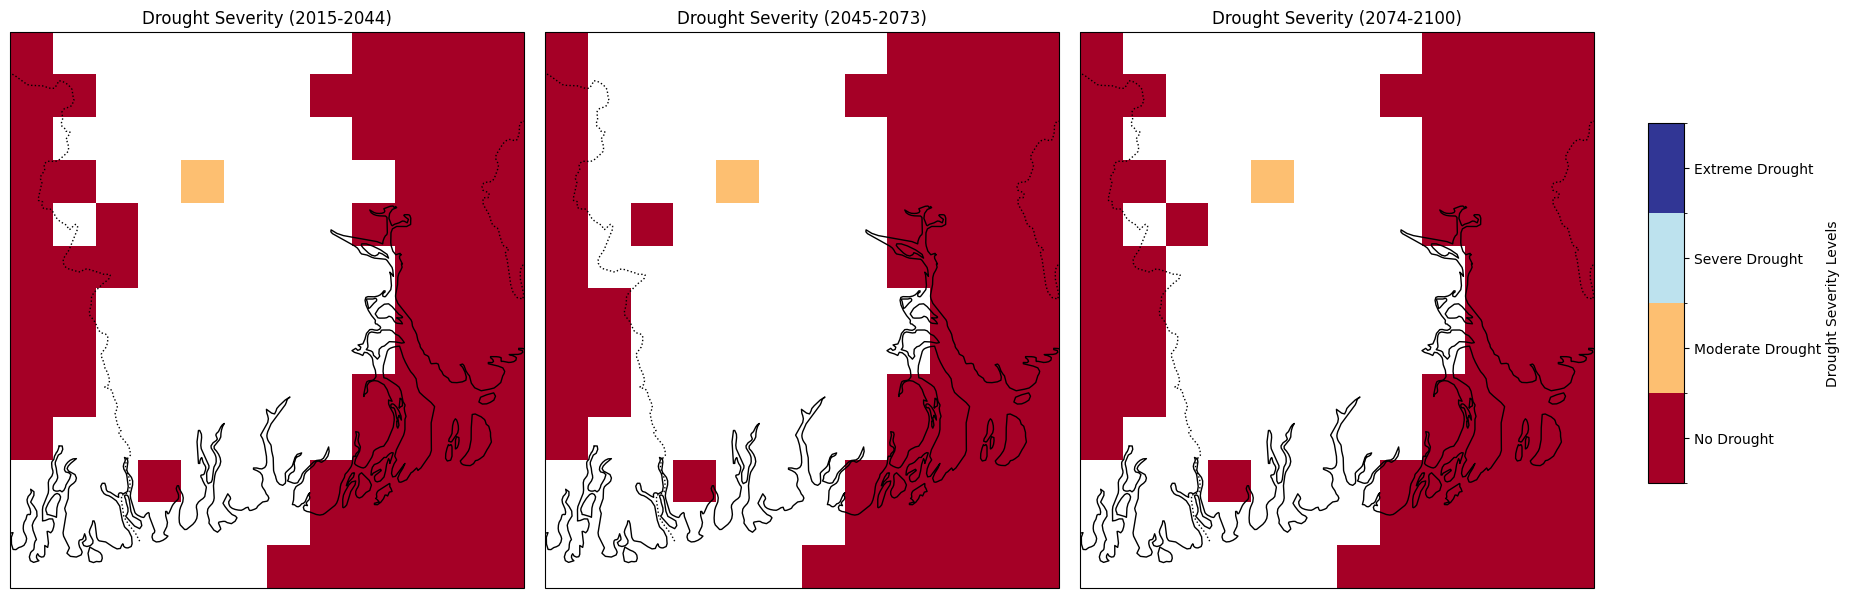

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load SPI data
spi_file = "/content/out_spi3.nc"  # Replace with your NetCDF file
ds = xr.open_dataset(spi_file)
spi = ds['SPI']  # Adjust variable name if needed

# Check dataset details
print(spi)

# Define time periods
time_periods = {
    "2015-2044": ("2015-01-01", "2044-12-31"),
    "2045-2073": ("2045-01-01", "2073-12-31"),
    "2074-2100": ("2074-01-01", "2100-12-31")
}

# Define drought severity categories and thresholds
severity_levels = {
    "No Drought": (0, np.inf),
    "Moderate Drought": (-1.5, -1.0),
    "Severe Drought": (-2.0, -1.5),
    "Extreme Drought": (-np.inf, -2.0)
}

# Assign severity levels to each SPI value
def classify_drought(spi_data):
    severity_map = xr.full_like(spi_data, fill_value=np.nan, dtype=np.float32)
    for i, (label, (lower, upper)) in enumerate(severity_levels.items(), start=1):
        severity_map = xr.where((spi_data >= lower) & (spi_data < upper), i, severity_map)
    return severity_map

# Create zoning maps for each time period
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position for shared colorbar

for i, (period, (start, end)) in enumerate(time_periods.items()):
    # Subset SPI data for the time period
    spi_period = spi.sel(time=slice(start, end))

    # Calculate mean SPI over the time period
    mean_spi = spi_period.mean(dim="time")

    # Classify drought severity
    severity_map = classify_drought(mean_spi)

    # Plot the severity map
    ax = axes[i]
    plot = severity_map.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap="RdYlBu", levels=np.arange(0.5, len(severity_levels) + 1.5, 1),
        add_colorbar=False
    )
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(f"Drought Severity ({period})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Add shared colorbar
cbar = fig.colorbar(plot, cax=cbar_ax, orientation="vertical", ticks=range(1, len(severity_levels) + 1))
cbar.ax.set_yticklabels(severity_levels.keys())
cbar.set_label("Drought Severity Levels")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.show()
